In [27]:
# import all the required libraries
import pandas as pd
import numpy as np
from collections import Counter
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from textblob import Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Balanced_7200.csv")

In [28]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

10206

In [29]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [30]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'love': 1250,
         'joy': 1250,
         'surprise': 1250,
         'sadness': 1250,
         'fear': 1250,
         'anger': 1250})

In [31]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [32]:
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [33]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [34]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [35]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [36]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [37]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [38]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulties parents child b...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [39]:
# Do the lametization on the features
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulty parent child bett...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [40]:
x = df.content
y = df.Emot

In [41]:
SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [42]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))

Train set has total 5250 entries with 17.12% sadness, 16.38% joy, 16.82% love, 16.42% anger, 16.70% fear, 16.55% surprise
Test set has total 2250 entries with 15.60% sadness, 17.33% joy, 16.31% love, 17.24% anger, 16.58% fear , 16.93% surprise


In [43]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [44]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [45]:
def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [46]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [47]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [48]:
def classifivation_report(mf, ng, spl):
    ug_cvec = CountVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [49]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [50]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

7708

In [51]:
cvec = CountVectorizer()
n_features = np.arange(1500,6001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


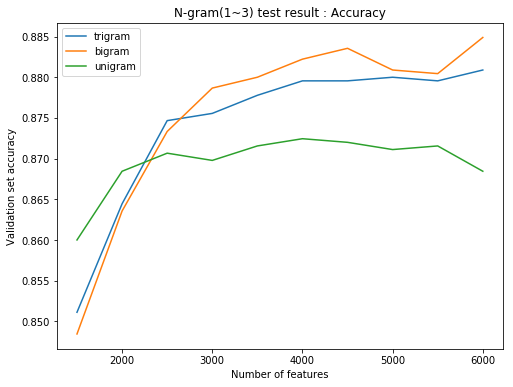

In [52]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [53]:
mf_ = 6000
ng_ = (1,2)
spl_ = 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 88.49%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       307   18     3     11     8         4
joy            17  328    27      7     7         4
love            5   17   343      1     1         0
anger          26    9     7    329    15         2
fear           10    4     0     13   317        29
surprise        0    1     1      2    10       367
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.91      0.85      0.88       388
         joy       0.89      0.85      0.87       373
        love       0.87      0.84      0.86       390
       anger       0.90      0.93      0.92       367
        fear       0.84      0.87      0.86       351
    surprise       0.90      0.96      0.93       381

   micro avg       0.88      0

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


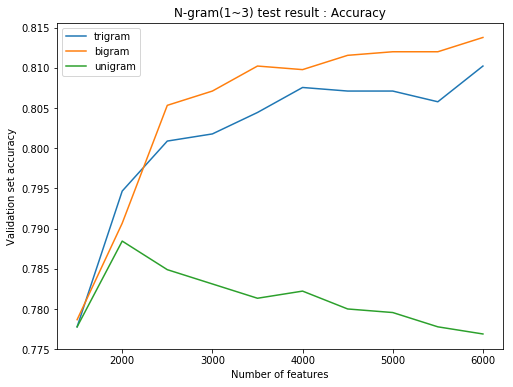

In [54]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [55]:
mf_ = 6000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 81.38%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       277   13    11     19    18        13
joy            25  276    42     14    18        15
love           10   26   318      5     6         2
anger          24   14    19    301    23         7
fear           16    2     6     14   304        31
surprise        1    5     4      4    12       355
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.84      0.78      0.81       388
         joy       0.80      0.82      0.81       373
        love       0.82      0.71      0.76       390
       anger       0.80      0.87      0.83       367
        fear       0.78      0.79      0.79       351
    surprise       0.84      0.93      0.88       381

   micro avg       0.81      0

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# ug_cvec = CountVectorizer(max_features=70000, ngram_range=(1, 3))
# ug_pipeline = Pipeline([
#         ('vectorizer', ug_cvec),
#         ('classifier', cls)
#     ])
# train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


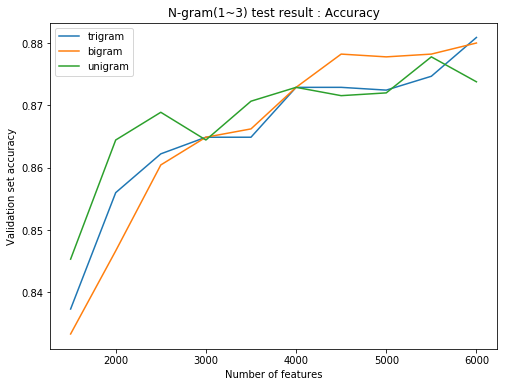

In [56]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [57]:
mf_ = 6000
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 88.09%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       302   18     4     12    11         4
joy            15  330    27      7     7         4
love            4   17   342      1     2         1
anger          21   11     7    330    17         2
fear            7    5     3     10   319        29
surprise        1    2     1      1    17       359
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.91      0.85      0.88       388
         joy       0.86      0.86      0.86       373
        love       0.86      0.85      0.85       390
       anger       0.89      0.93      0.91       367
        fear       0.86      0.86      0.86       351
    surprise       0.90      0.94      0.92       381

   micro avg       0.88      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


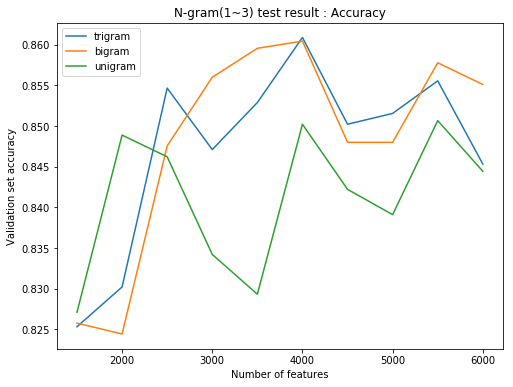

In [58]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [59]:
mf_ = 5500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.00%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       305   20     5     10     6         5
joy            30  314    26      6     9         5
love           11   17   335      1     1         2
anger          35    9     7    321    13         3
fear           19    7     3     17   297        30
surprise        2    2     1      2    11       363
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.83      0.86       388
         joy       0.88      0.80      0.84       373
        love       0.85      0.81      0.83       390
       anger       0.89      0.91      0.90       367
        fear       0.76      0.87      0.81       351
    surprise       0.89      0.95      0.92       381

   micro avg       0.86      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.876
0.8626666666666667
0.8626666666666667
0.8653333333333333
0.8573333333333333
0.8586666666666667
0.876
0.8786666666666667
0.8666666666666667
0.868
Avg Accuracy 0.8672000000000001


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


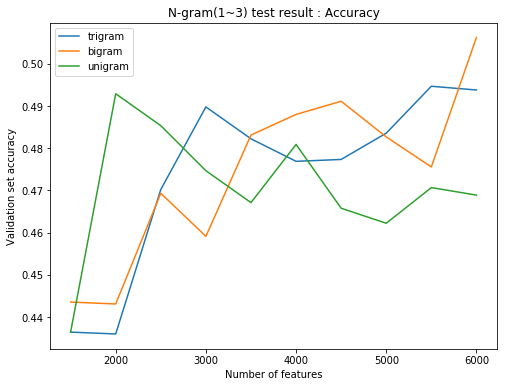

In [60]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [61]:
mf_ = 6000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 50.62%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       133  121     3     55    32         7
joy            52  240    14     50    27         7
love           33  127   123     58    20         6
anger          33   92     8    227    20         8
fear           41   72     3     56   172        29
surprise       26   53     2     30    26       244
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.48      0.59      0.53       388
         joy       0.58      0.46      0.51       373
        love       0.34      0.62      0.44       390
       anger       0.80      0.34      0.47       367
        fear       0.42      0.38      0.40       351
    surprise       0.81      0.64      0.72       381

   micro avg       0.51      0

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


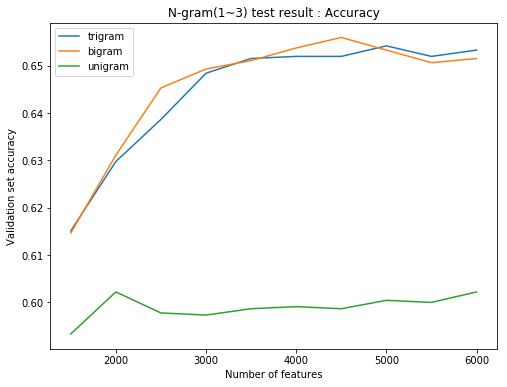

In [62]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [63]:
mf_ = 4500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 65.60%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       213  104     7     13    10         4
joy            91  236    33     14    12         4
love           54   63   235      8     6         1
anger          83   57    16    204    25         3
fear           46   51     5     18   221        32
surprise        5    6     1      1     1       367
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.79      0.53      0.63       388
         joy       0.80      0.59      0.68       373
        love       0.46      0.61      0.52       390
       anger       0.79      0.64      0.71       367
        fear       0.43      0.61      0.51       351
    surprise       0.89      0.96      0.93       381

   micro avg       0.66      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


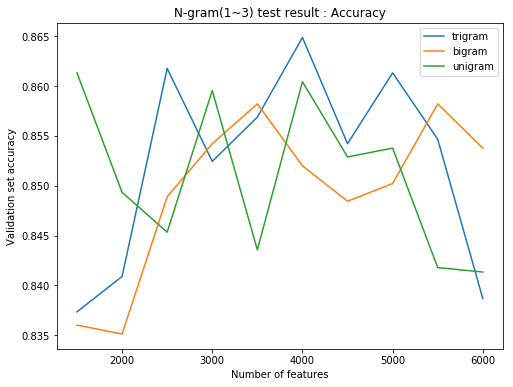

In [64]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [65]:
mf_ = 4000
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 85.42%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       262   54     6     15    10         4
joy            20  317    27      7    14         5
love            4   27   330      1     2         3
anger          16   14     2    332    21         3
fear            5    6     2     12   319        29
surprise        2    1     1      0    15       362
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.86      0.88       388
         joy       0.84      0.86      0.85       373
        love       0.76      0.81      0.78       390
       anger       0.90      0.90      0.90       367
        fear       0.85      0.75      0.79       351
    surprise       0.89      0.95      0.92       381

   micro avg       0.85      0